**MiniProject Workflow**

- upload and read data
- make unique IDs - and make them into Numbers
- plot the data


In [67]:
import pandas as pd
import scipy as sc
import matplotlib.pylab as pl
import seaborn as sns

ERROR: Error in parse(text = input): <text>:1:8: unexpected symbol
1: import pandas
           ^


In [65]:
#upload and read data
data = pd.read_csv("../data/LogisticGrowthData.csv")

#check data column tables
print(("loaded {} columns".format(len(data.columns.values))))
print(data.columns.values)

#load metadata 
pd.read_csv("../data/LogisticGrowthMetaData.csv")

#check first 5 rows 
data.head()

#print values of PopBio_units and Time_unit columns 
print(data.PopBio_units.unique())
print(data.Time_units.unique())

#create unique ID for each experiment. Add new column at first position in df, combo of species, temp, medium and citation. 
data.insert(0, "ID", data.Species + "_" + data.Temp.map(str) + "_" + data.Medium + "_" + data.Citation)
#check ID
print(data.ID.unique()) 

#new subset data with ID matches a specidic species, experimental condition and source reference. 
data_subset = data[data['ID']=='Chryseobacterium.balustinum_5_TSB_Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.']
data_subset.head()

#plot data of subset
sns.lmplot(x= "Time", y = "PopBio", data = data_subset, fit_reg = False) 

ERROR: Error in parse(text = input): <text>:5:27: unexpected symbol
4: #check data column tables
5: print(("loaded {} columns".format
                             ^


**Model Fitting using NLLS**


[1]  1  6 11 16 21 26 31 36 41 46

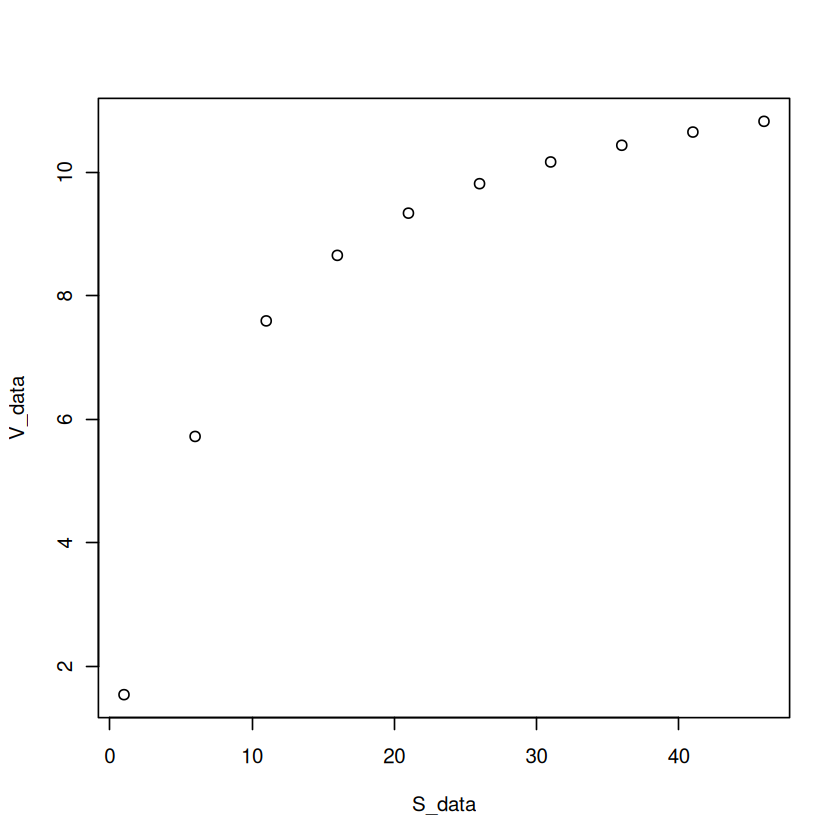

In [63]:
S_data <- seq(1,50,5)
S_data

#generate a Michaelis Menten reaction 
V_data <- ((12.5 * S_data) / (7.1 + S_data))
plot(S_data, V_data)

Vmax = 12.5 and Km = 7.1 is arbitrary. Adding random normally distributed fluctuations to data to emulate expperimental measurement error

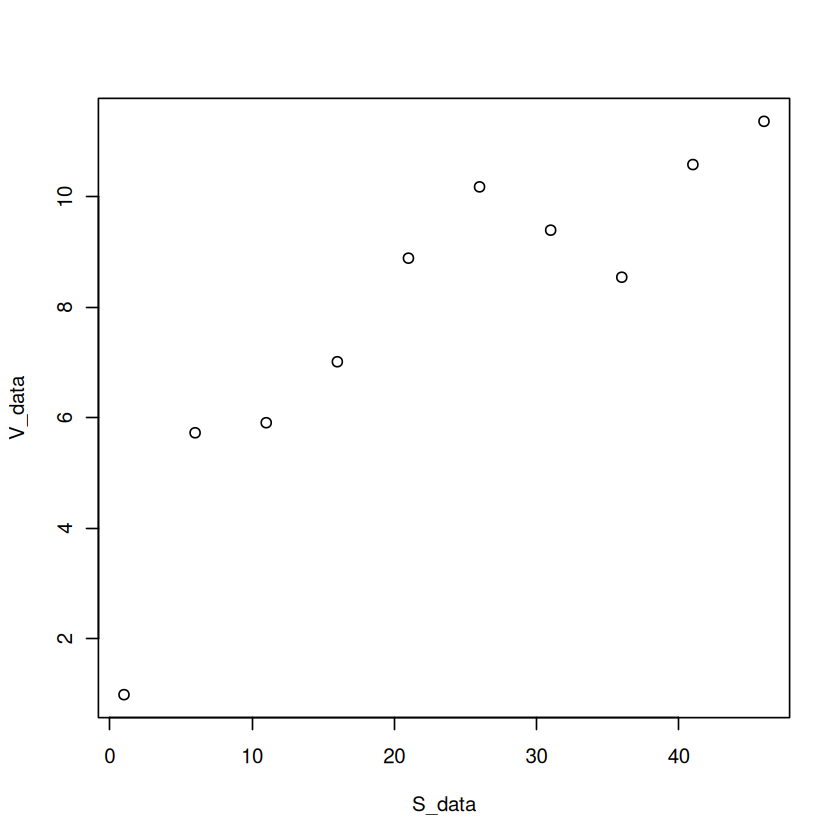

In [3]:
set.seed(1456)
V_data <- V_data + rnorm(10, 0, 1)
plot(S_data, V_data)

Fitting model using NLLS

V_max      K_M 
12.96364 10.60707

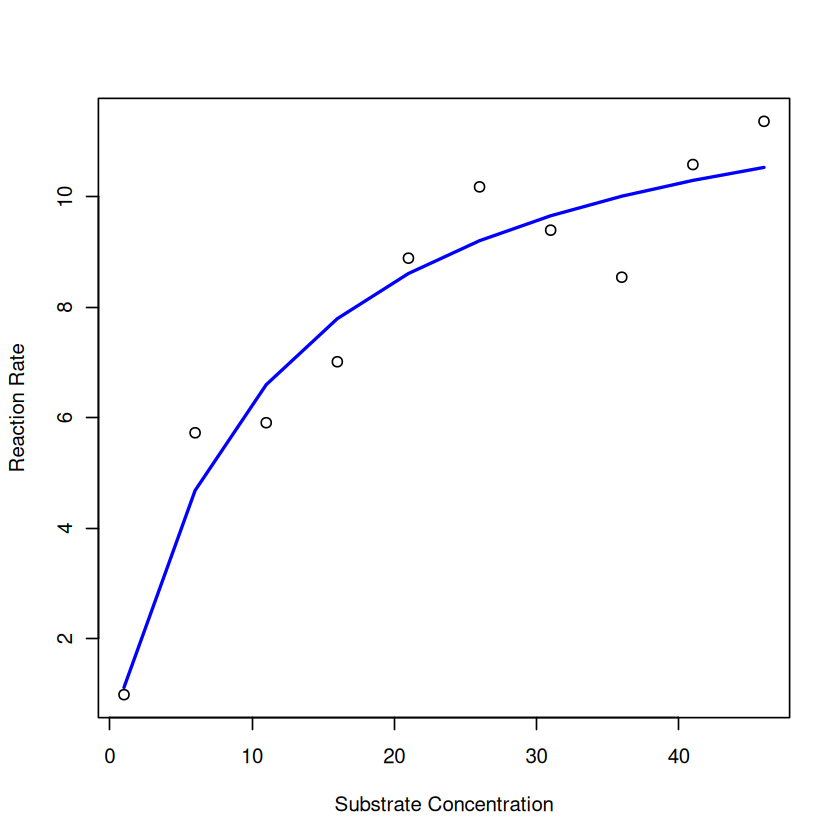

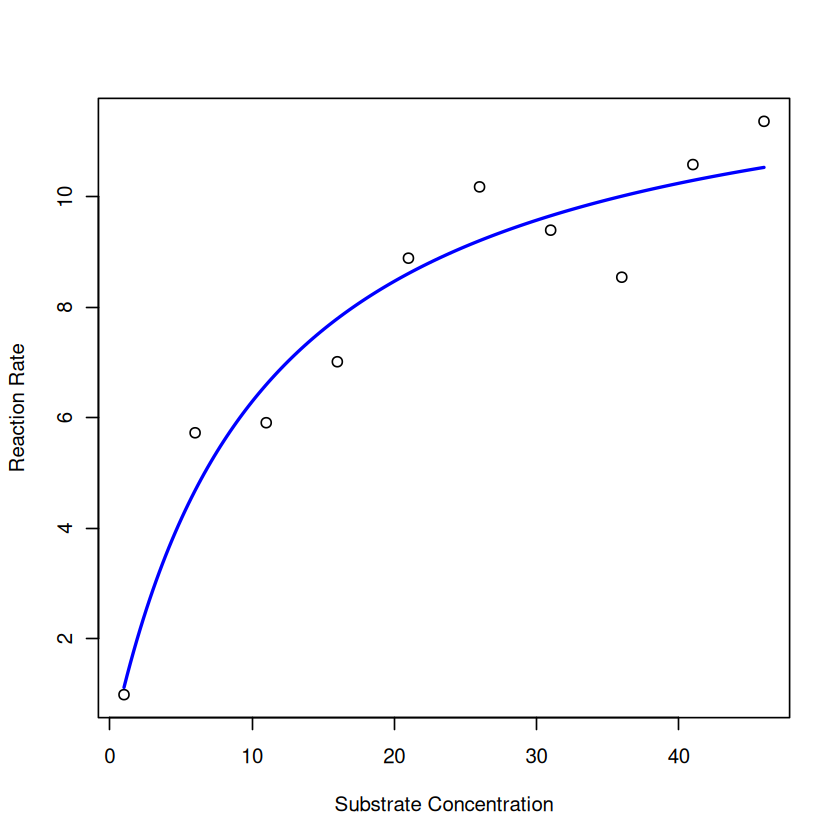

In [18]:
V_max <- 12.5
K_M <- 7.1
start_values <- list(V_max = 200, K_M = 0.05)
MM_model <- nls(V_data ~ V_max * S_data / (K_M + S_data), start = start_values, data = data.frame(S_data, V_data))
#gave it starting values 

plot(S_data,V_data, xlab = "Substrate Concentration", ylab = "Reaction Rate")  # first plot the data 
lines(S_data,predict(MM_model),lty=1,col="blue",lwd=2) # now overlay the fitted model 

coef(MM_model)

Substrate2Plot <- seq(min(S_data), max(S_data),len=200) # generate some new x-axis values just for plotting 
Predict2Plot <- coef(MM_model)["V_max"] * Substrate2Plot / (coef(MM_model)["K_M"] + Substrate2Plot) # calculate the predicted values by plugging the fitted coefficients into the model equation 
plot(S_data,V_data, xlab = "Substrate Concentration", ylab = "Reaction Rate")  # first plot the data 
lines(Substrate2Plot, Predict2Plot, lty=1,col="blue",lwd=2) # now overlay the fitted model

In [ ]:
summary(MM_model)


Formula: V_data ~ V_max * S_data/(K_M + S_data)

Parameters:
      Estimate Std. Error t value Pr(>|t|)    
V_max   12.964      1.221  10.616 5.42e-06 ***
K_M     10.607      3.266   3.248   0.0117 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8818 on 8 degrees of freedom

Number of iterations to convergence: 9 
Achieved convergence tolerance: 5.68e-06


^^ looks like output of a linear model and of a linear regression. 

- Estimates: output of lm() function for fitting linear models. Estimated coeff = quite different w the NLLS fitting. - bec we added normally distributed errors. 
- St E, t val, Pr(<|t|), residual std error have same interpretation as in the output of an lm()
- smaller Std E : more precise estimate of variables 
- t value : Estimate / std E. tests parameter = 0 (no effect). Higher t value - greater stat evidence against the null hypothesis. 
- P val: smaller than 0.05 suggests the effect is stat significant - reject null hypothesis - there is an effect
- residual std error: measure of quality of fit. estimates std dev of residuals. smaller res error -> better fit of model 
- archived convergence tolerance - how close final solution is to true model solution - smaller values indicating the parameter estimates have converged well to a stable solution
- number of iterations to convergence - how many times NLLS algorithm had to adjust parameter values till it managed to find a solution that minimizes RSS. 


#Statistical inference using NLLS fits
- R^2 in NLLS fitting not reliable. 
- after NLLS fitting - can calculate Confidence Intervals 

In [21]:
confint(MM_model)

Waiting for profiling to be done...



,2.5%,97.5%
V_max,10.640478,17.00502
K_M,4.924546,22.39246


Confidence Intervals can be useful because:
- can use coef/parameter estimate CI to test whether it is significantly different from some reference value 
- in out example - CI of KM do have 7.1 in the range
- test whether coef estimates of same model coef obtained from differ popu (samples) are significantly differ from eachother --- CI dont overap = significantly differ
- altho - when CI overlap there may still be a stat sign difference betw coeffuicients

- NLLS is not an exact procedure -- if starting values are reasonable NLLS is exact enough


A. nls() <- Gauss Newton algorithm - will fail if starting values are too far from what optimal values would be. 
B. nlsLM() <- Levenberg Marqualdt algorithm


In [ ]:
install.packages("minpack.lm")
require("minpack.lm")

Installing package into ‘/home/anna/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)



Loading required package: minpack.lm



Nonlinear regression model
  model: V_data ~ V_max * S_data/(K_M + S_data)
   data: parent.frame()
V_max   K_M 
12.96 10.61 
 residual sum-of-squares: 6.22

Number of iterations to convergence: 12 
Achieved convergence tolerance: 1.49e-08

Nonlinear regression model
  model: V_data ~ V_max * S_data/(K_M + S_data)
   data: parent.frame()
V_max   K_M 
12.96 10.61 
 residual sum-of-squares: 6.22

Number of iterations to convergence: 10 
Achieved convergence tolerance: 1.49e-08

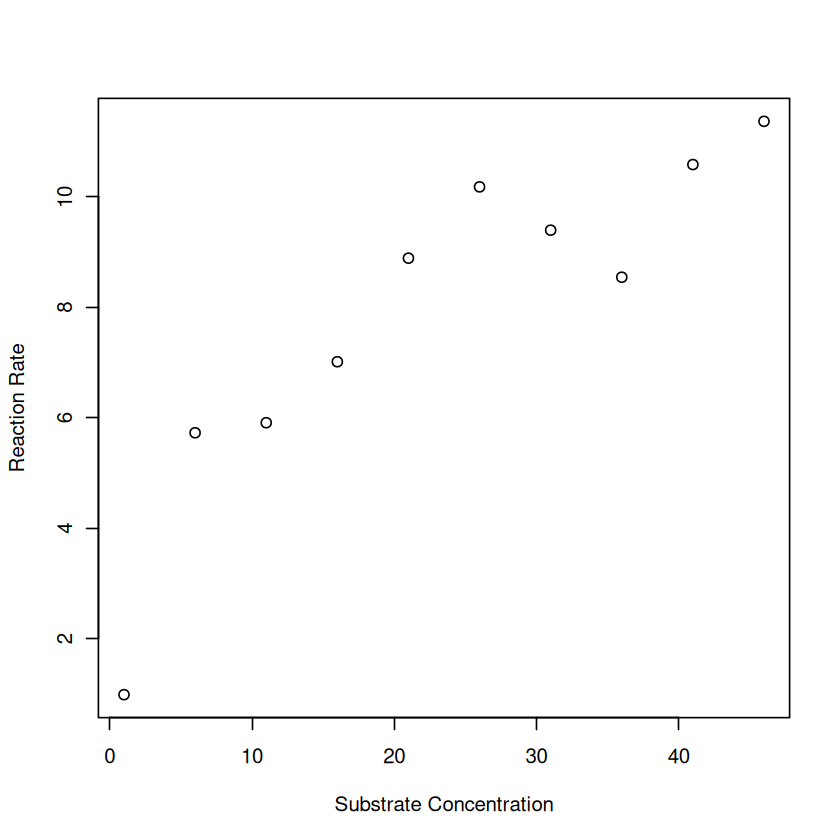

In [24]:
nlsLM(V_data ~ V_max * S_data / (K_M + S_data), start = list(V_max = 0.1, K_M = 0.1))

plot(S_data, V_data, xlab = "Substrate Concentration", ylab = "Reaction Rate")

nlsLM(V_data ~ V_max * S_data / (K_M + S_data), start = list(V_max = 0.1, K_M = 0.1), lower=c(0.4,0.4), upper=c(100,100))


When you add bounds - solution found in fewer iterations

In [25]:
nlsLM(V_data ~ V_max * S_data / (K_M + S_data), start =  list(V_max = 0.5, K_M = 0.5), lower=c(0.4,0.4), upper=c(20,20))

Nonlinear regression model
  model: V_data ~ V_max * S_data/(K_M + S_data)
   data: parent.frame()
V_max   K_M 
16.09 20.00 
 residual sum-of-squares: 9.227

Number of iterations to convergence: 3 
Achieved convergence tolerance: 1.49e-08

^^ algorithm converged to a poor solution - took fewer iterations could not explore combo of vmax and km
- plot residuals to a fitten NLLS model 


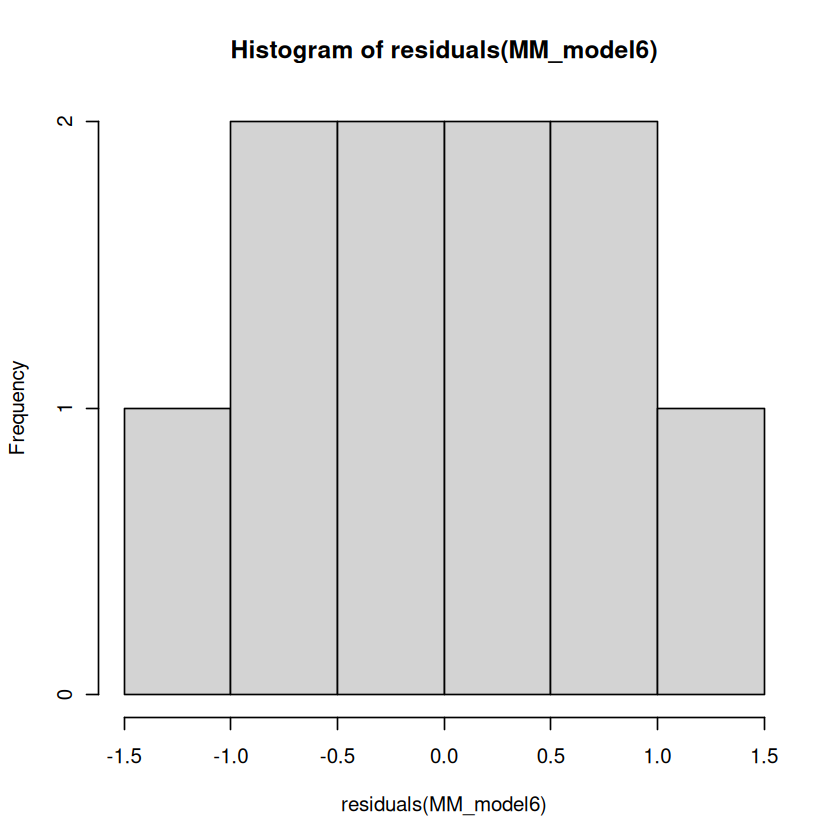

In [26]:
MM_model6 <- nlsLM(V_data ~ V_max * S_data / (K_M + S_data), start = list(V_max = .01, K_M = 20))
hist(residuals(MM_model6))

Residuals look OK - we used normal distributed errors
to further look at diagnostics - nlstools package
preview command - how good starting values are

# Comparing Models - how can we know there isnt a better model to explain pattern in dataset


This is code would work on imaginary data


1. QuaFit <- lm(BodyWeight ~ poly(TotalLength,2), data = Data2Fit)
2. Predic2PlotQua <- predict.lm(QuaFit, data.frame(TotalLength = Lengths))
3. plot(Data2Fit$TotalLength, Data2Fit$BodyWeight)
4. lines(Lengths, Predic2PlotPow, col = 'blue', lwd = 2.5)
5. lines(Lengths, Predic2PlotQua, col = 'red', lwd = 2.5)

![alt text](image.png)

very similar fits - quadratc model deviates a bit from data at lower end of data range. 


again imaginary dataste
- RSS_Pow <- sum(residuals(PowFit)^2) # Residual sum of squares
- TSS_Pow <- sum((Data2Fit$BodyWeight - mean(Data2Fit$BodyWeight))^2) # Total sum of squares
- RSq_Pow <- 1 - (RSS_Pow/TSS_Pow) # R-squared value

- RSS_Qua <- sum(residuals(QuaFit)^2) # Residual sum of squares
- TSS_Qua <- sum((Data2Fit$BodyWeight - mean(Data2Fit$BodyWeight))^2) # Total sum of squares
- RSq_Qua <- 1 - (RSS_Qua/TSS_Qua) # R-squared value

- RSq_Pow 
- RSq_Qua

would give

- 0.90054752976309
- 0.900302864503218

Not very useful R2 in general is a good model of fit but not for model selection

Instead we use the *AIC* Akaike Information Criterion


imaginary dataset 

n <- nrow(Data2Fit) #set sample size

pPow <- length(coef(PowFit)) # get number of parameters in power law model

pQua <- length(coef(QuaFit)) # get number of parameters in quadratic model

AIC_Pow <- n + 2 + n * log((2 * pi) / n) + n * log(RSS_Pow) + 2 * pPow

AIC_Qua <- n + 2 + n * log((2 * pi) / n) + n * log(RSS_Qua) + 2 * pQua

AIC_Pow - AIC_Qua

RESULTS:
-2.14742608125084

can be done by
AIC(PowFit) - AIC(QuaFit)



AIC value difference > -2 *more negative is better* is acceptable cutodd
The power law (allometric model - better fit here )

##Bacterial Population Growth models 
Bacterial growth models are specialized forms of population growth models that specifically describe how bacterial populations increase in size over time under various conditions. These models are crucial in microbiology, biotechnology, food safety, and medical research. They help predict how bacteria respond to different environments, which is vital for understanding infection dynamics, antibiotic effects, and the preservation of perishable goods.

### Common Bacterial Growth Models

1. **Exponential Growth Model**:
   - This model assumes that the growth rate of the population is proportional to its current size. In ideal conditions with unlimited resources, bacteria reproduce at a constant rate.
   - **Formula**: \( N(t) = N_0 \times e^{rt} \)
   - Where \( N(t) \) is the population at time \( t \), \( N_0 \) is the initial population size, and \( r \) is the growth rate.

2. **Logistic Growth Model**:
   - When environmental constraints affect growth (like nutrient depletion or waste accumulation), the logistic model is more applicable. It includes a carrying capacity, which is the maximum population size that the environment can sustain.
   - **Formula**: \( N(t) = \frac{K \times N_0}{N_0 + (K - N_0)e^{-rt}} \)
   - Here, \( K \) represents the carrying capacity.

3. **Monod Model**:
   - Similar to the Michaelis-Menten kinetics in enzyme activity, the Monod model describes growth kinetics as a function of nutrient concentration. It's particularly useful in continuous culture experiments.
   - **Formula**: \( \mu = \mu_{\max} \frac{S}{K_S + S} \)
   - Where \( \mu \) is the specific growth rate, \( \mu_{\max} \) is the maximum specific growth rate, \( S \) is the limiting nutrient concentration, and \( K_S \) is the half-saturation constant.

4. **Gompertz Model**:
   - This model is often used to describe the sigmoidal growth curve of bacterial populations, especially useful in predicting the lag, exponential, and stationary phases of growth in batch cultures.
   - **Formula**: \( N(t) = N_0 \times e^{-e^{\frac{\mu_{\max} \times e \times (t_{\text{lag}} - t)}{L} + 1}} \)
   - Where \( L \) is the upper asymptote (similar to carrying capacity), \( t_{\text{lag}} \) is the lag time before exponential growth, and \( \mu_{\max} \) is the maximum growth rate.

5. **Baranyi Model**:
   - This model provides a more detailed approach to handling lag phase dynamics and bacterial adaptation to new environments, including both the lag phase and the subsequent growth.
   - It includes terms to adjust growth rate dynamically based on environmental conditions and past population history.

### Applications of Bacterial Growth Models:
- **Medical Research**: Understanding how bacterial colonies grow can help in developing treatment strategies and understanding disease progression.
- **Food Industry**: Predicting how bacteria grow in food products helps in assessing shelf life and safety standards.
- **Wastewater Treatment**: Bacterial growth models are crucial in optimizing the degradation of organic matter.

These models form the basis for more complex simulations and can be adapted to include multiple species interactions, spatial heterogeneity, and varying environmental conditions, thus providing extensive insights into microbial ecology and industrial applications.


Comparing 3 different models:
- Von Bertalanffy model is commonly used for modelling the growth of an individual
- classical Logistic growth equation 
- straight line lm()

Imaginary dataset alb

logistic1 <- function(t, r, K, N0){
 N0 * K * exp(r * t)/(K+N0 * (exp(r * t)-1))
}

vonbert.w <- function(t, Winf, c, K){
 Winf * (1 - exp(-K * t) + c * exp(-K * t))^3
}

scale <- 4000
alb.lin <- lm(wt/scale ~ age, data = alb)

alb.log <- nlsLM(wt/scale~logistic1(age, r, K, N0), start=list(K=1, r=0.1, N0=0.1), data=alb)

alb.vb <- nlsLM(wt/scale~vonbert.w(age, Winf, c, K), start=list(Winf=0.75, c=0.01, K=0.01), data=alb)

^ Scaling data - improve stability of estimates 

calc predictions:
ages <- seq(0, 100, length=1000)

pred.lin <- predict(alb.lin, newdata = list(age=ages)) * scale

pred.log <- predict(alb.log, newdata = list(age=ages)) * scale

pred.vb <- predict(alb.vb, newdata = list(age=ages)) * scale



plot data

plot(alb$age, alb$wt, xlab="age (days)", ylab="weight (g)", xlim=c(0,100))

lines(ages, pred.lin, col=2, lwd=2)

lines(ages, pred.log, col=3, lwd=2)

lines(ages, pred.vb, col=4, lwd=2)

legend("topleft", legend = c("linear", "logistic", "Von Bert"), lwd=2, lty=1, col=2:4)

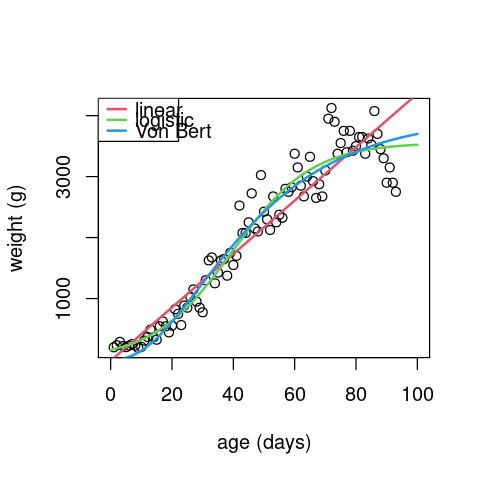

Examine residuals betw 3 models:


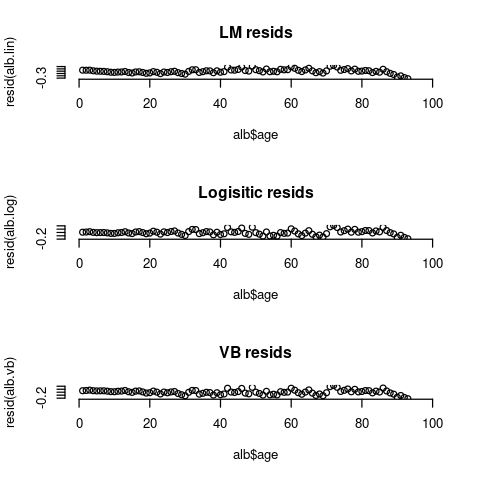


^ still exhibit some pattern - data goes down near end of observation - none of these models capture that behaviour

simpler approach -- Sums of Sq Erros SSE

n <- length(alb$wt)
list(lin=signif(sum(resid(alb.lin)^2)/(n-2 * 2), 3), 
 log= signif(sum(resid(alb.log)^2)/(n-2 * 3), 3), 
 vb= signif(sum(resid(alb.vb)^2)/(n-2 * 3), 3))   

 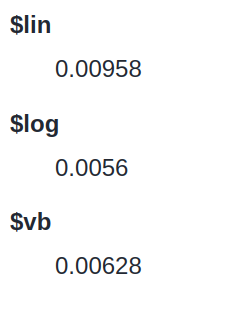


 - adjusted SSE accounts for sample size and number of parameters by dividing RSS by residual degrees of freedom 
 - is less robust than AIC/BIC 
 - logistic model has lowest adjusted SSE - best by measure

##Population growth rates

- Malthusian principle: popu grows exponentially while abundance is low and resources are not limited.
- This growth then slows and stops as resources become limiting
- there may be a time lag befor epopu takes off at the start
- bacterial growth in batch culture follows a distinct set of phases 
    1. Lag phase - transcriptional machinert acruvated - nutrient uptake and metabolic changes
    2. Exponential phase - bacteria divide at constant rate - popu doubling w each generation
    3. Stationary phase - when carrying capacity is reached - number of cells in culture stabilises

In [31]:
t <- seq(0, 22, 2)
N <- c(32500, 33000, 38000, 105000, 445000, 1430000, 3020000, 4720000, 5670000, 5870000, 5930000, 5940000)

set.seed(1234) # To ensure we always get the same random sequence in this example "dataset" 

data <- data.frame(t, N * (1 + rnorm(length(t), sd = 0.1))) # add some random error

names(data) <- c("Time", "N")

head(data)

,Time,N
,<dbl>,<dbl>
1,0,28577.04
2,2,33915.52
3,4,42120.88
4,6,80370.17
5,8,464096.05
6,10,1502365.99


added sampling erros 

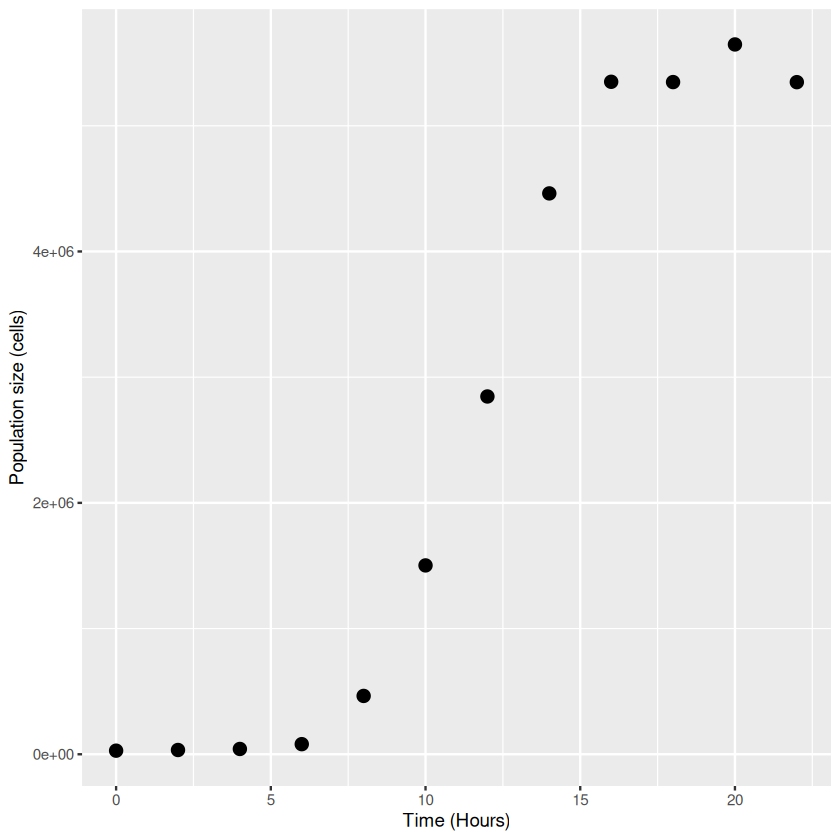

In [ ]:
library(ggplot2)

ggplot(data, aes(x = Time, y = N)) + 
 geom_point(size = 3) +
 labs(x = "Time (Hours)", y = "Population size (cells)")

Size of exponentially growing popu N at any given time t

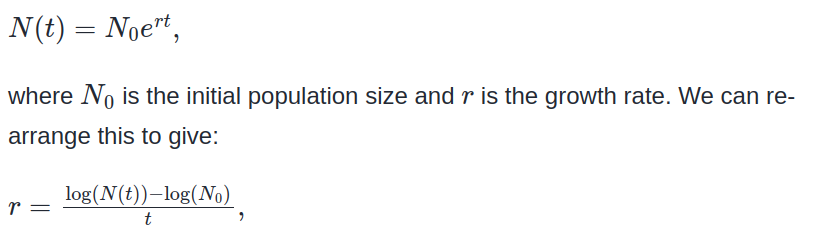


in exponential growth at constant rate - growth rate can be calculated as difference in log of 2 popu sizes over time. 

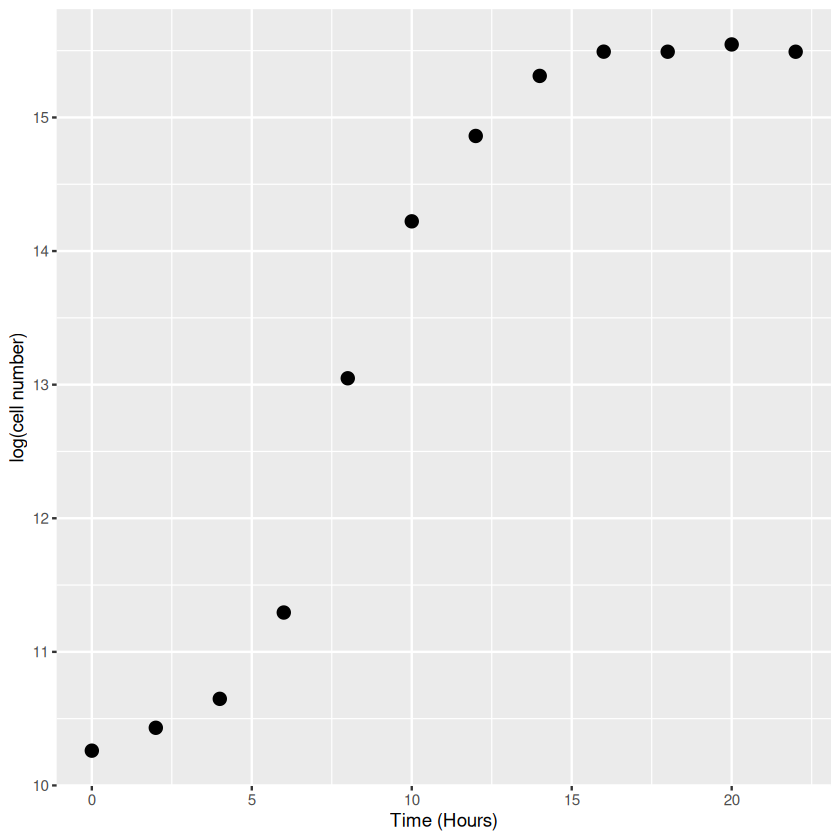

In [34]:
data$LogN <- log(data$N)

# visualise
ggplot(data, aes(x = t, y = LogN)) + 
 geom_point(size = 3) +
 labs(x = "Time (Hours)", y = "log(cell number)")

In [35]:
(data[data$Time == 10,]$LogN - data[data$Time == 6,]$LogN)/(10-6)

[1] 0.7320383

^ most basic estimate of r

In [36]:
diff(data$LogN)

[1]  0.171269154  0.216670872  0.646099643  1.753448393  1.174704941
 [6]  0.639023868  0.449529740  0.181493482 -0.000450184  0.054490710
[11] -0.054600924

^ pick maximum observed gradient to the curve - gives log popu size difference between timepoint pairs

we want MAX/Time-step


In [37]:
max(diff(data$LogN))/2 # 2 is the difference in any successive pair of timepoints

[1] 0.8767242

Using OLS 

to take some error in measurement - need to fir a lm() thru them instead - slope gives growth rate. 


In [38]:
lm_growth <- lm(LogN ~ Time, data = data[data$Time > 2 & data$Time < 12,])
summary(lm_growth)


Call:
lm(formula = LogN ~ Time, data = data[data$Time > 2 & data$Time < 
    12, ])

Residuals:
       3        4        5        6 
 0.21646 -0.38507  0.12076  0.04785 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   7.9366     0.5350  14.835  0.00451 **
Time          0.6238     0.0728   8.569  0.01335 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3256 on 2 degrees of freedom
Multiple R-squared:  0.9735,	Adjusted R-squared:  0.9602 
F-statistic: 73.42 on 1 and 2 DF,  p-value: 0.01335


r = 0.6 <- closer to truth - but still a guesstimate

to do better: iterate thru differ windows of points - compare slopes and find which highest gives max growth rate rmax --- rolling regression


# Using NLLS

Logistic equation:
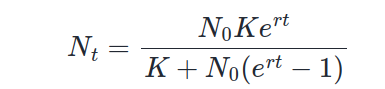

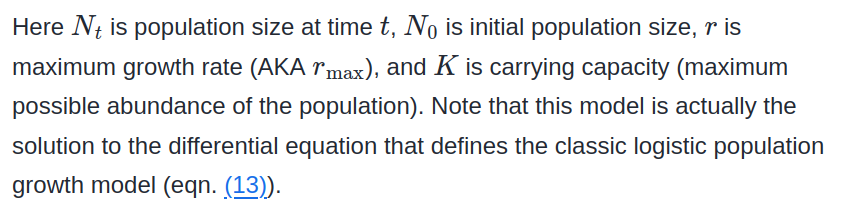






In [42]:
logistic_model <- function(t, r_max, K, N_0){ # The classic logistic equation
 return(N_0 * K * exp(r_max * t)/(K + N_0 * (exp(r_max * t) - 1)))
}

In [43]:
# first we need some starting parameters for the model
N_0_start <- min(data$N) # lowest population size
K_start <- max(data$N) # highest population size
r_max_start <- 0.62 # use our estimate from the OLS fitting from above

fit_logistic <- nlsLM(N ~ logistic_model(t = Time, r_max, K, N_0), data,
      list(r_max=r_max_start, N_0 = N_0_start, K = K_start))

summary(fit_logistic)


Formula: N ~ logistic_model(t = Time, r_max, K, N_0)

Parameters:
       Estimate Std. Error t value Pr(>|t|)    
r_max 6.309e-01  3.791e-02  16.641 4.56e-08 ***
N_0   3.317e+03  1.451e+03   2.286   0.0481 *  
K     5.538e+06  7.192e+04  76.995 5.32e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 119200 on 9 degrees of freedom

Number of iterations to convergence: 12 
Achieved convergence tolerance: 1.49e-08


plot the fit

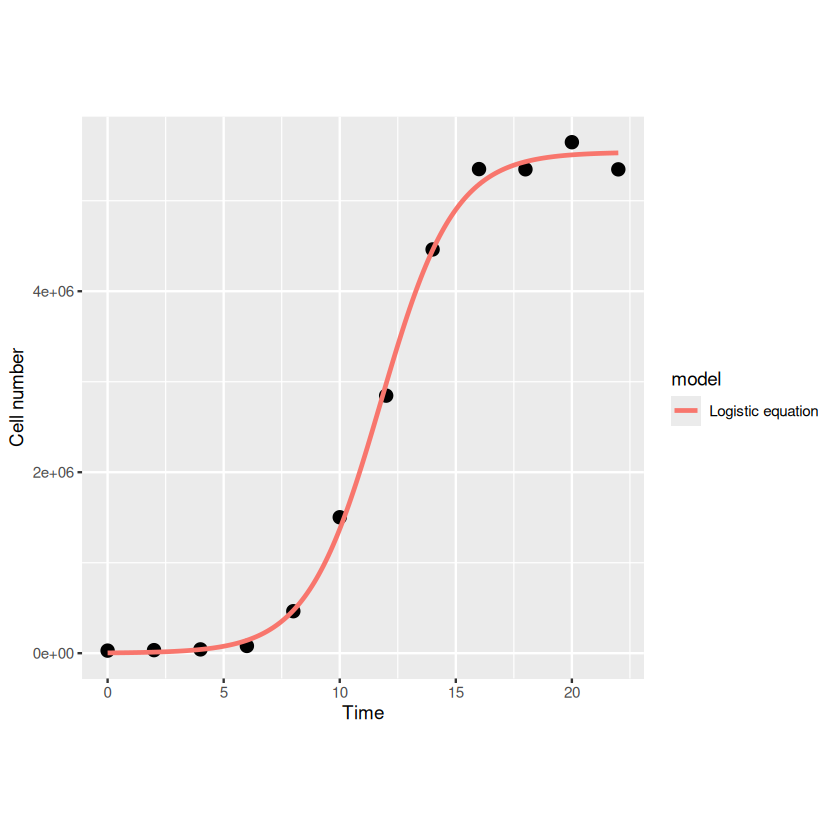

In [ ]:
timepoints <- seq(0, 22, 0.1)

logistic_points <- logistic_model(t = timepoints, 
         r_max = coef(fit_logistic)["r_max"], 
         K = coef(fit_logistic)["K"], 
         N_0 = coef(fit_logistic)["N_0"])
df1 <- data.frame(timepoints, logistic_points)
df1$model <- "Logistic equation"
names(df1) <- c("Time", "N", "model")

ggplot(data, aes(x = Time, y = N)) +
 geom_point(size = 3) +
 geom_line(data = df1, aes(x = Time, y = N, col = model), size = 1) +
 theme(aspect.ratio=1)+ # make the plot square 
 labs(x = "Time", y = "Cell number")


looks nice  ^^ non log transformed data

rmax estimate 0.64 is close to what we got w OLS fitting



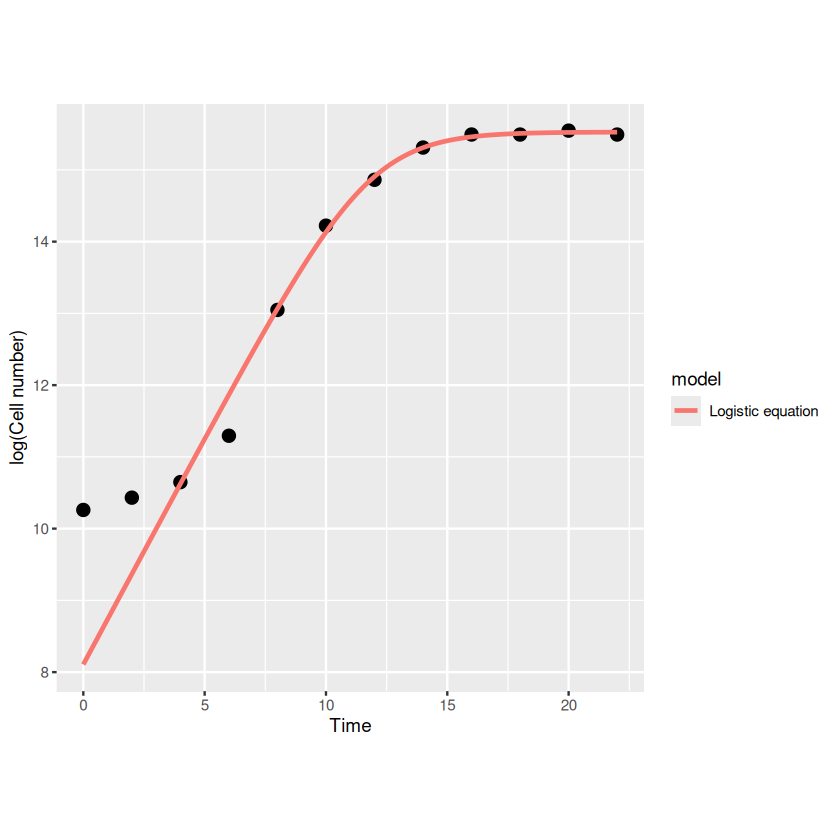

In [ ]:
ggplot(data, aes(x = Time, y = LogN)) +
 geom_point(size = 3) +
 geom_line(data = df1, aes(x = Time, y = log(N), col = model), size = 1) +
 theme(aspect.ratio=1)+ 
 labs(x = "Time", y = "log(Cell number)")

on log transformed data ^^ model diverges from data on lower end - without log not visible (clear w log scale)



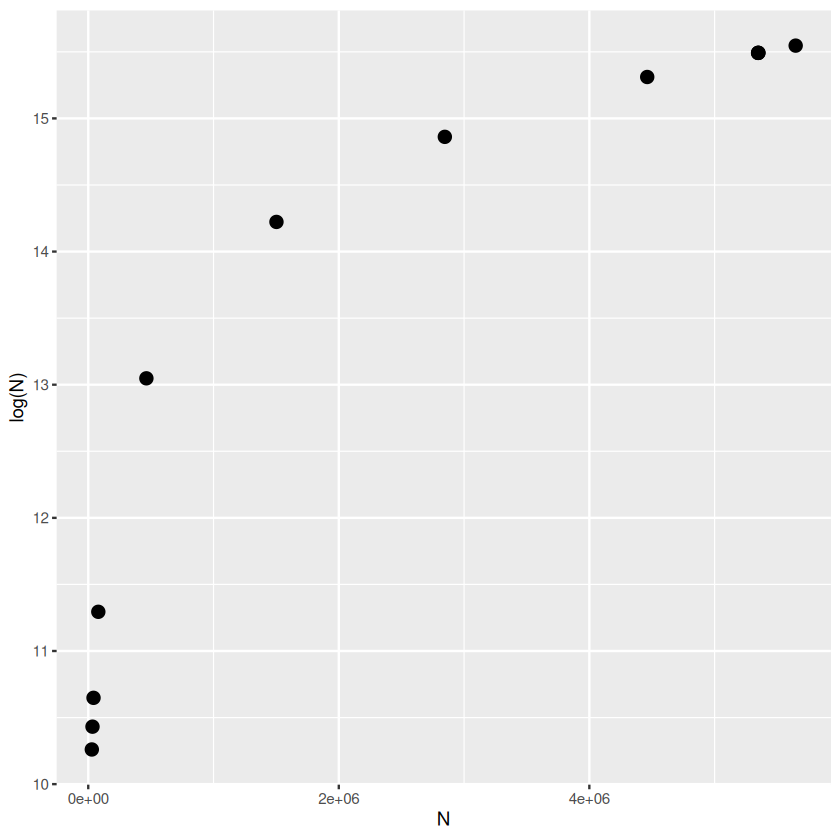

In [49]:
ggplot(data, aes(x = N, y = LogN)) +
 geom_point(size = 3) +
 theme(aspect.ratio = 1)+ 
 labs(x = "N", y = "log(N)")

Issues w taking log : negative values of populations & assumes data starts from start (0)

time lag - natural 
    bacteria encounter fresh growth media in lab or new resource/env in the field - take time to acclimate -- activate genes in nutrient uptake and metabolic processes - before beginning exponential growth 

to model lag phase : Gompertz model

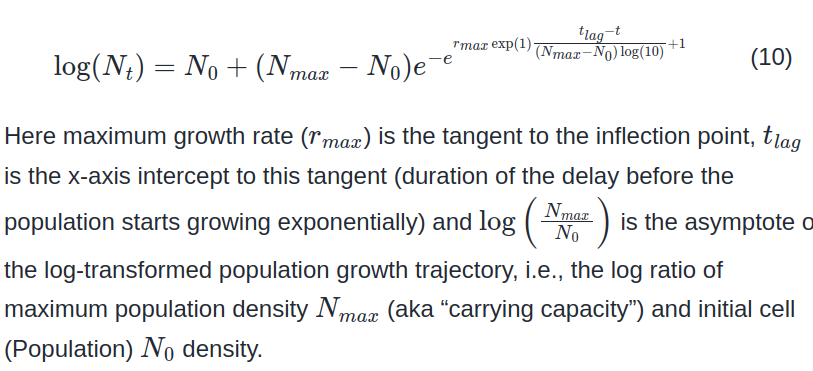

which is in log scale - model is not derived from differential equation but designed to fit to log transformed data

Fit and compare alternative nonlinear growth models:



In [50]:
gompertz_model <- function(t, r_max, K, N_0, t_lag){ # Modified gompertz growth model (Zwietering 1990)
 return(N_0 + (K - N_0) * exp(-exp(r_max * exp(1) * (t_lag - t)/((K - N_0) * log(10)) + 1)))
}   

In [51]:
N_0_start <- min(data$LogN) # lowest population size, note log scale
K_start <- max(data$LogN) # highest population size, note log scale
r_max_start <- 0.62 # use our previous estimate from the OLS fitting from above
t_lag_start <- data$Time[which.max(diff(diff(data$LogN)))] # find last timepoint of lag phase

In [56]:
diff(data$LogN) # same as what we did above - get differentials

diff(diff(data$LogN)) # get the differentials of the differentials (approx 2nd order derivatives)


which.max(diff(diff(data$LogN))) # find the timepoint where this 2nd order derivative really takes off 


data$Time[which.max(diff(diff(data$LogN)))] # This then is a good guess for the last timepoint of the lag phase

[1]  0.171269154  0.216670872  0.646099643  1.753448393  1.174704941
 [6]  0.639023868  0.449529740  0.181493482 -0.000450184  0.054490710
[11] -0.054600924

[1]  0.04540172  0.42942877  1.10734875 -0.57874345 -0.53568107 -0.18949413
 [7] -0.26803626 -0.18194367  0.05494089 -0.10909163

[1] 3

[1] 4

In [59]:
fit_gompertz <- nlsLM(LogN ~ gompertz_model(t = Time, r_max, K, N_0, t_lag), data,
      list(t_lag=t_lag_start, r_max=r_max_start, N_0 = N_0_start, K = K_start))


summary(fit_gompertz)


Formula: LogN ~ gompertz_model(t = Time, r_max, K, N_0, t_lag)

Parameters:
      Estimate Std. Error t value Pr(>|t|)    
t_lag  4.80680    0.18433   26.08 5.02e-09 ***
r_max  1.86616    0.08749   21.33 2.45e-08 ***
N_0   10.39142    0.05998  173.24 1.38e-15 ***
K     15.54956    0.05056  307.57  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09418 on 8 degrees of freedom

Number of iterations to convergence: 10 
Achieved convergence tolerance: 1.49e-08


see how the fits of the two nonlin models compare

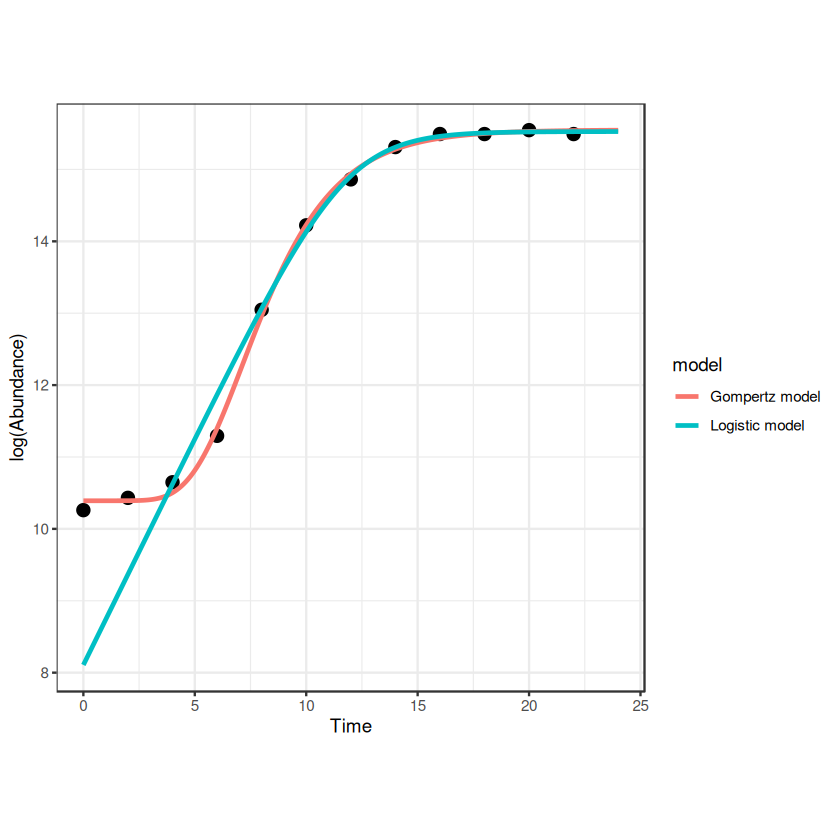

In [60]:
timepoints <- seq(0, 24, 0.1)

logistic_points <- log(logistic_model(t = timepoints, 
          r_max = coef(fit_logistic)["r_max"], 
          K = coef(fit_logistic)["K"], 
          N_0 = coef(fit_logistic)["N_0"]))

gompertz_points <- gompertz_model(t = timepoints, 
         r_max = coef(fit_gompertz)["r_max"], 
         K = coef(fit_gompertz)["K"], 
         N_0 = coef(fit_gompertz)["N_0"], 
         t_lag = coef(fit_gompertz)["t_lag"])

df1 <- data.frame(timepoints, logistic_points)
df1$model <- "Logistic model"
names(df1) <- c("Time", "LogN", "model")

df2 <- data.frame(timepoints, gompertz_points)
df2$model <- "Gompertz model"
names(df2) <- c("Time", "LogN", "model")

model_frame <- rbind(df1, df2)

ggplot(data, aes(x = Time, y = LogN)) +
 geom_point(size = 3) +
 geom_line(data = model_frame, aes(x = Time, y = LogN, col = model), size = 1) +
 theme_bw() + # make the background white
 theme(aspect.ratio=1)+ # make the plot square 
 labs(x = "Time", y = "log(Abundance)")

Gompertz model fits better than logistic growth equation 

big difference in the rmax value from the two models 
rmax is lower in Logistic model - bc it ignores the lag phase 


Starting values - understand model parameters in model and how they correspond to real data 

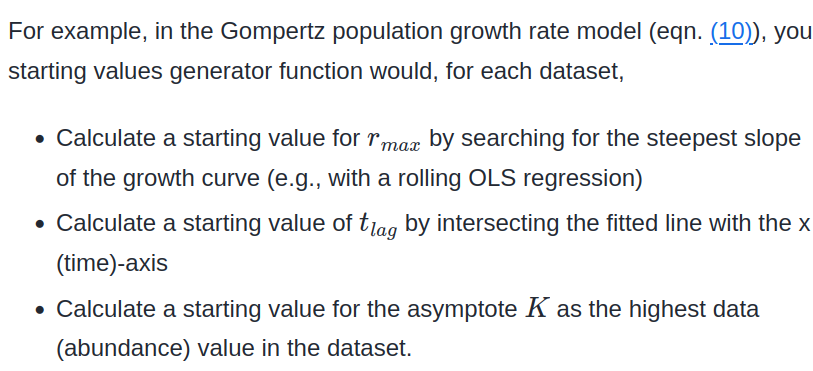


rerun fitting attempts multiple times -- sampling each of the start values randomly

in SI growth rates in the Logistic or Gompertz models would be in units of s^-1

https://www.rdocumentation.org/packages/minpack.lm/versions/1.2-1/topics/nlsLM

to look at nlsLM parameter bounds



## **DATA WRANGLing / VISUALISATION / UNDERSTANDING IT**
#### Tues 4 March

- visualise it 
- normalise it 
- plot it 


In [70]:
dataset <- read.csv("../data/LogisticGrowthData.csv")
metadata <- read.csv("../data/LogisticGrowthMetaData.csv")

names(dataset)
str(dataset)
head(dataset)


summary(dataset)

dim(dataset) #nrow and ncol


[1] "X"            "Time"         "PopBio"       "Temp"         "Time_units"  
 [6] "PopBio_units" "Species"      "Medium"       "Rep"          "Citation"

'data.frame':	4387 obs. of  10 variables:
 $ X           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Time        : num  670 647 623 598 575 ...
 $ PopBio      : num  0.283 0.283 0.285 0.282 0.273 ...
 $ Temp        : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Time_units  : chr  "Hours" "Hours" "Hours" "Hours" ...
 $ PopBio_units: chr  "OD_595" "OD_595" "OD_595" "OD_595" ...
 $ Species     : chr  "Chryseobacterium.balustinum" "Chryseobacterium.balustinum" "Chryseobacterium.balustinum" "Chryseobacterium.balustinum" ...
 $ Medium      : chr  "TSB" "TSB" "TSB" "TSB" ...
 $ Rep         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Citation    : chr  "Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm f"| __truncated__ "Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm f"| __truncated__ "Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm f"| __trun

,X,Time,PopBio,Temp,Time_units,PopBio_units,Species,Medium,Rep,Citation
,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,669.8795,0.2832757,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080."
2,2,646.9880,0.2833421,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080."
3,3,622.8916,0.2851510,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080."
4,4,597.5904,0.2817461,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080."
5,5,574.6988,0.2731168,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080."
6,6,550.6024,0.2575345,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080."


##### What is PopBio?
- numerical column - represents biological population data 
- unit : OD 595 - refers to optical desnity measured at 595nm wavelength - used in microbiology to estimate the growth of microorg. in a culture
- this optical density measurement at this sepcific wavekength - helps assess cell concentration or biomass in solution - cell absorb light 


1. check units of 
- Time 
- Pop Bio
  

In [71]:
unique_time_units <- unique(dataset$Time_units)
print(unique_time_units)

[1] "Hours"


In [73]:
unique_popbio_units <- unique(dataset$PopBio_units)
print(unique_popbio_units)

[1] "OD_595"    "N"         "CFU"       "DryWeight"


##### - Time: hours 
##### - PopBio: OD_595, N, CFU, DryWeight
- do I need to standardise Pop Bio units? 

2. check if mediums are all the same 
- Mediums are not the same - there are 17 different ones. 


In [74]:
unique_mediums <- unique(dataset$Medium)
print(unique_mediums)

 [1] "TSB"                       "ESAW"                     
 [3] "Raw Chicken Breast"        "Salted Chicken Breast"    
 [5] "Cooked Chicken Breast"     "Vacuum Beef Striploins"   
 [7] "C02 Beef Striploins"       "Pasteurised Skim Milk"    
 [9] "UHT Skim Milk"             "Pasteurised Full-fat Milk"
[11] "UHT Full-fat Milk"         "Pasteurised Double Cream" 
[13] "UHT Double Cream"          "TGE agar"                 
[15] "MRS broth"                 "Z8"                       
[17] "APT Broth"                 "MRS"                      


3. Plot PopBio vs Time grouped by BioPop Units

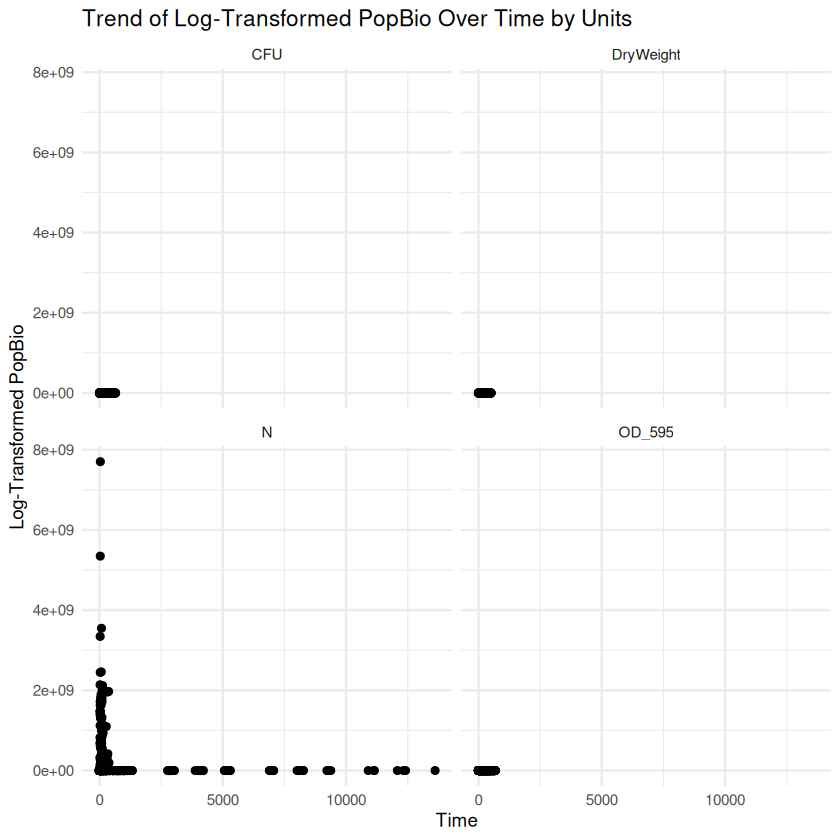

In [81]:

library(ggplot2)

ggplot(dataset, aes(x = Time, y = PopBio)) + 
  geom_point() +  # Plot points
  facet_wrap(~PopBio_units) +  # Facet by PopBio_units
  labs(x = "Time", y = "Log-Transformed PopBio", title = "Trend of Log-Transformed PopBio Over Time by Units") +
  theme_minimal()  # Use a minimal theme for a cleaner look


^ clearly doesnt work - I need to consider each dataset seperately by ID-ing the experiments

4. create IDs 
5. check if IDs are unique


ID structure : species, experimental condition (likely temp), medium, citation

In [124]:
# Create a unique ID combining Species, Temp, Medium, and Citation
dataset$ID <- with(dataset, paste(Species, Temp, Medium, Rep, Citation, sep = "_"))
names(dataset)
# Check unique IDs
print(unique(dataset$ID))


[1] "num_ID"       "X"            "Time"         "PopBio"       "Temp"        
 [6] "Time_units"   "PopBio_units" "Species"      "Medium"       "Rep"         
[11] "Citation"     "ID"

  [1] "Chryseobacterium.balustinum_5_TSB_1_Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080."                        
  [2] "Enterobacter.sp._5_TSB_1_Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080."                                   
  [3] "Pantoea.agglomerans.1_5_TSB_1_Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080."                              
  [4] "Pantoea.agglomerans.2_5_TSB_1_Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Gro

6. give a ID number to each ID

In [147]:
# Convert the 'ID' column to factors first
dataset$ID <- as.factor(dataset$ID)

# Then convert these factor levels to numeric IDs
dataset$num_ID <- as.numeric(dataset$ID)


head(dataset) #check dataset
print(length(unique(dataset$num_ID)) == length(unique(dataset$ID))) #check if conversion works


,num_ID,X,Time,PopBio,Temp,Time_units,PopBio_units,Species,Medium,Rep,Citation,ID
,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<fct>
1,95,1,669.8795,0.2832757,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.","Chryseobacterium.balustinum_5_TSB_1_Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080."
2,95,2,646.9880,0.2833421,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.","Chryseobacterium.balustinum_5_TSB_1_Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080."
3,95,3,622.8916,0.2851510,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.","Chryseobacterium.balustinum_5_TSB_1_Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080."
4,95,4,597.5904,0.2817461,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.","Chryseobacterium.balustinum_5_TSB_1_Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080."
5,95,5,574.6988,0.2731168,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.","Chryseobacterium.balustinum_5_TSB_1_Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080."
6,95,6,550.6024,0.2575345,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.","Chryseobacterium.balustinum_5_TSB_1_Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080."


[1] TRUE


In [126]:
# Remove the ID_factor column from the dataframe
dataset$ID_factor <- NULL

# Optionally, check the structure of the dataframe to ensure the column is removed
str(dataset)


'data.frame':	4387 obs. of  12 variables:
 $ num_ID      : num  95 95 95 95 95 95 95 95 95 95 ...
 $ X           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Time        : num  670 647 623 598 575 ...
 $ PopBio      : num  0.283 0.283 0.285 0.282 0.273 ...
 $ Temp        : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Time_units  : chr  "Hours" "Hours" "Hours" "Hours" ...
 $ PopBio_units: chr  "OD_595" "OD_595" "OD_595" "OD_595" ...
 $ Species     : chr  "Chryseobacterium.balustinum" "Chryseobacterium.balustinum" "Chryseobacterium.balustinum" "Chryseobacterium.balustinum" ...
 $ Medium      : chr  "TSB" "TSB" "TSB" "TSB" ...
 $ Rep         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Citation    : chr  "Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm f"| __truncated__ "Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm f"| __truncated__ "Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S

reorder dataset so that num ID is first

In [127]:
names(dataset)
# Reorder columns to make num_ID the first column
dataset <- dataset[c("num_ID", setdiff(names(dataset), "num_ID"))]
names(dataset)

head(dataset)

[1] "num_ID"       "X"            "Time"         "PopBio"       "Temp"        
 [6] "Time_units"   "PopBio_units" "Species"      "Medium"       "Rep"         
[11] "Citation"     "ID"

[1] "num_ID"       "X"            "Time"         "PopBio"       "Temp"        
 [6] "Time_units"   "PopBio_units" "Species"      "Medium"       "Rep"         
[11] "Citation"     "ID"

,num_ID,X,Time,PopBio,Temp,Time_units,PopBio_units,Species,Medium,Rep,Citation,ID
,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<fct>
1,95,1,669.8795,0.2832757,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.","Chryseobacterium.balustinum_5_TSB_1_Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080."
2,95,2,646.9880,0.2833421,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.","Chryseobacterium.balustinum_5_TSB_1_Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080."
3,95,3,622.8916,0.2851510,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.","Chryseobacterium.balustinum_5_TSB_1_Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080."
4,95,4,597.5904,0.2817461,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.","Chryseobacterium.balustinum_5_TSB_1_Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080."
5,95,5,574.6988,0.2731168,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.","Chryseobacterium.balustinum_5_TSB_1_Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080."
6,95,6,550.6024,0.2575345,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.","Chryseobacterium.balustinum_5_TSB_1_Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080."


Subset num_ID w ID to have as back up - like a metadata
    save it in ../data/ID_metadata.csv

In [131]:
# Subset the dataset to include only num_ID and ID columns
IDsubset_dataset <- dataset[, c("num_ID", "ID")]
# View the first few rows of the subset
head(IDsubset_dataset)

# Save the subset as a CSV file
write.csv(IDsubset_dataset, "../data/ID_metadata.csv", row.names = FALSE)




,num_ID,ID
,<dbl>,<fct>
1,95,"Chryseobacterium.balustinum_5_TSB_1_Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080."
2,95,"Chryseobacterium.balustinum_5_TSB_1_Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080."
3,95,"Chryseobacterium.balustinum_5_TSB_1_Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080."
4,95,"Chryseobacterium.balustinum_5_TSB_1_Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080."
5,95,"Chryseobacterium.balustinum_5_TSB_1_Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080."
6,95,"Chryseobacterium.balustinum_5_TSB_1_Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080."


Make a new subset dataset - that you'll mainly work with 

ID_num, Time, PopBio, PopBio_unit

In [132]:
names(dataset)
subset_dataset <- dataset[, c("num_ID", "Time", "PopBio", "PopBio_units")]
# View the first few rows of the subset
head(subset_dataset)

write.csv(subset_dataset, "../data/subset_data.csv", row.names = FALSE)


[1] "num_ID"       "X"            "Time"         "PopBio"       "Temp"        
 [6] "Time_units"   "PopBio_units" "Species"      "Medium"       "Rep"         
[11] "Citation"     "ID"

,num_ID,Time,PopBio,PopBio_units
,<dbl>,<dbl>,<dbl>,<chr>
1,95,669.8795,0.2832757,OD_595
2,95,646.9880,0.2833421,OD_595
3,95,622.8916,0.2851510,OD_595
4,95,597.5904,0.2817461,OD_595
5,95,574.6988,0.2731168,OD_595
6,95,550.6024,0.2575345,OD_595


7. plot each ID to look at it 

[1] "num_ID"       "Time"         "PopBio"       "PopBio_units"

,num_ID,Time,PopBio,PopBio_units
,<int>,<dbl>,<dbl>,<chr>
1,95,669.8795,0.2832757,OD_595
2,95,646.9880,0.2833421,OD_595
3,95,622.8916,0.2851510,OD_595
4,95,597.5904,0.2817461,OD_595
5,95,574.6988,0.2731168,OD_595
6,95,550.6024,0.2575345,OD_595


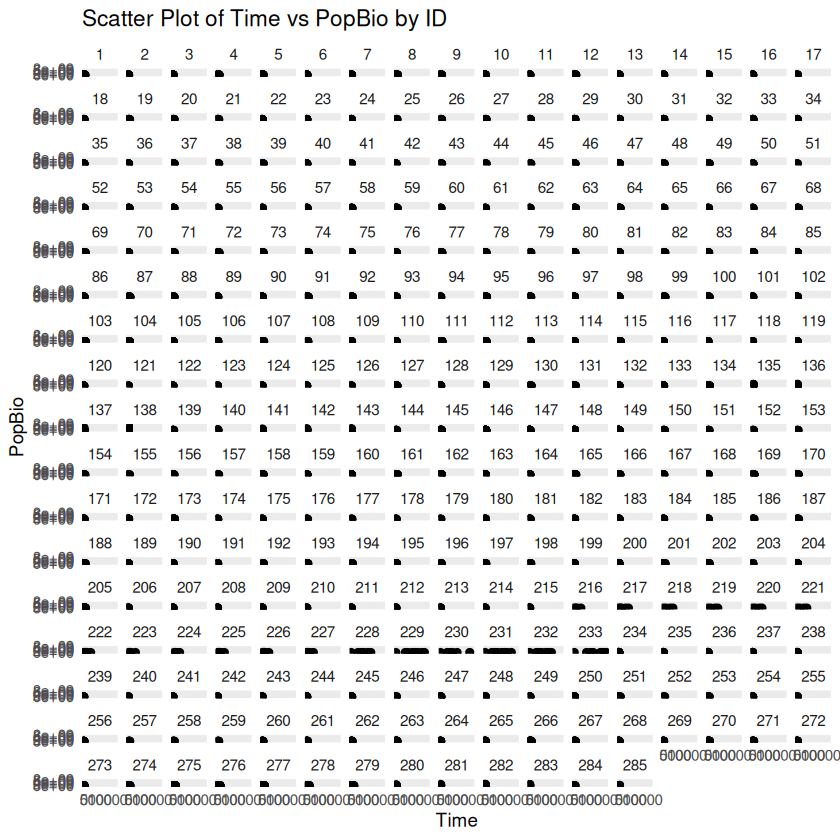

In [ ]:
pop_data <- read.csv("../data/subset_data.csv")
names(pop_data)
head(pop_data)


library(ggplot2)
# Create a scatter plot with separate panels for each ID
ggplot(subset_dataset, aes(x = Time, y = PopBio)) +
  geom_point() +
  facet_wrap(~ num_ID) +  # Creates a separate plot for each num_ID
  labs(title = "Scatter Plot of Time vs PopBio by ID",
       x = "Time",
       y = "PopBio") +
  theme_minimal()




In [ ]:

names(subset_dataset)

ID1_subset <- subset(subset_dataset, num_ID == 1)
head(ID1_subset)


[1] "num_ID"       "Time"         "PopBio"       "PopBio_units"

,num_ID,Time,PopBio,PopBio_units
,<dbl>,<dbl>,<dbl>,<chr>
1063,1,479.4457,0.08052964,OD_595
1064,1,455.4273,0.09370285,OD_595
1065,1,431.4088,0.09620939,OD_595
1066,1,407.3903,0.09871594,OD_595
1067,1,383.3718,0.09855581,OD_595
1068,1,359.3533,0.10906236,OD_595


,num_ID,Time,PopBio,PopBio_units
,<dbl>,<dbl>,<dbl>,<chr>
1063,1,479.4457,0.08052964,OD_595
1064,1,455.4273,0.09370285,OD_595
1065,1,431.4088,0.09620939,OD_595
1066,1,407.3903,0.09871594,OD_595
1067,1,383.3718,0.09855581,OD_595
1068,1,359.3533,0.10906236,OD_595


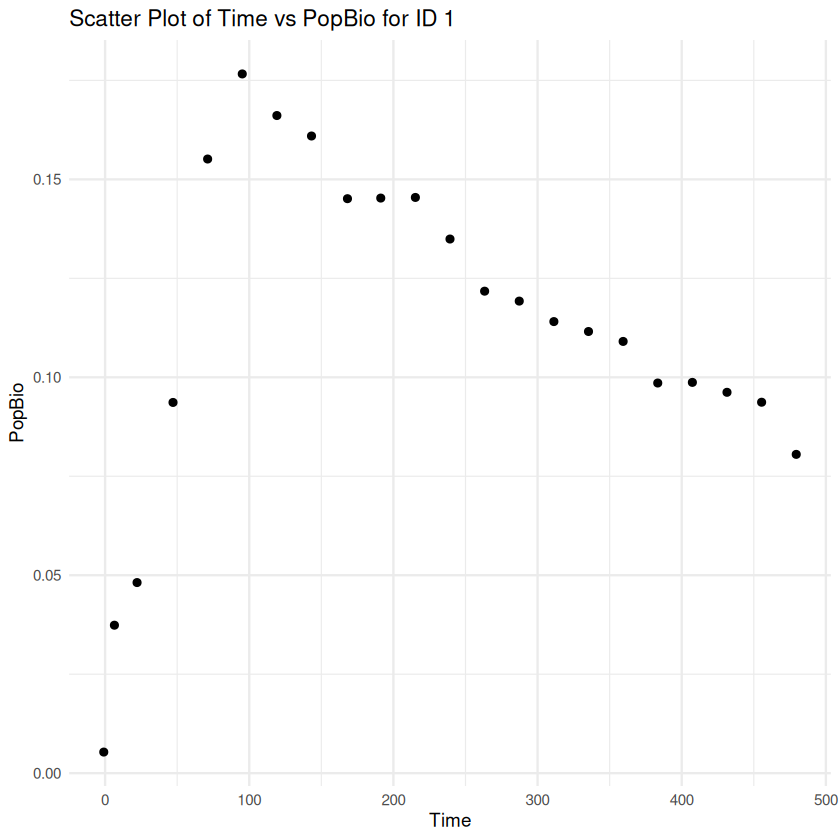

In [135]:
ID1_subset <- subset(subset_dataset, num_ID == 1)
head(ID1_subset)
ggplot(ID1_subset, aes(x = Time, y = PopBio)) +
  geom_point() +   # Creates a separate plot for each num_ID
  labs(title = "Scatter Plot of Time vs PopBio for ID 1",
       x = "Time",
       y = "PopBio") +
  theme_minimal()

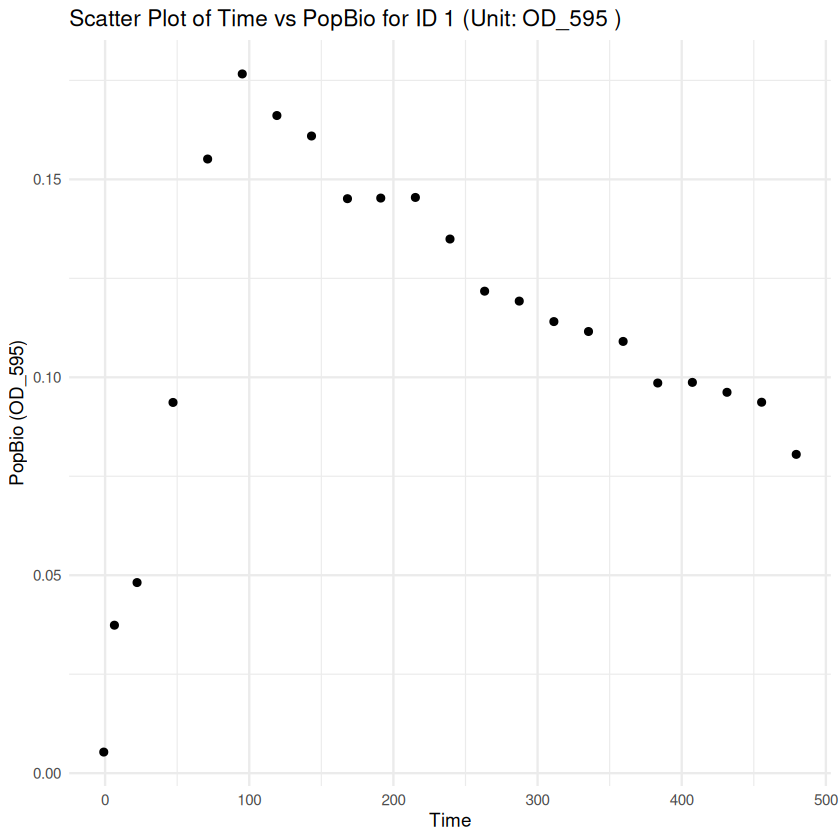

In [136]:
ID1_subset <- subset(subset_dataset, num_ID == 1)
unique_unit <- unique(ID1_subset$PopBio_units)

# Check if there is only one unique unit
if(length(unique_unit) == 1) {
  unit_label <- unique_unit
} else {
  unit_label <- "Various Units"  # or handle differently if needed
}


ggplot(ID1_subset, aes(x = Time, y = PopBio)) +
  geom_point() +  # Adds scatter plot points
  labs(title = paste("Scatter Plot of Time vs PopBio for ID 1 (Unit:", unit_label, ")"),
       x = "Time",
       y = paste("PopBio (", unit_label, ")", sep = "")) +
  theme_minimal()  # Applies a minimalistic theme



how can i make this as a loop - create subsets called ID1_subset, ID2_subset, ID3_subset ... and plot the Time against PopBio. I want the ID_num to be in the title ("Scatter plot of time vs PopBio for ID 1)

[1] 641873

[1] 149 149 149 149 149 149

[1] 285


  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
 22  15  15  29  22  14  16  29  25  15  16  29  11  10  12   9   9   8   9  10 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
 10  10   8   8   6   7   7  12  14  14  12  12  12   9  10   9   9  10  10   9 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  8   6   7   6   6  14  13  15  17   8   5   8  11  14   8   9   9  10  19   8 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  8   7  17  18   7   8   8  14  18   9  10  16  12  19   7  10  17  13  13  14 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
 11  16   9  22  14  15  29  22  15  17  29  22  12  15  29  24  15  17  29  24 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
 17  17  29  25  16  18  29  24  16  18  29  30  17  17  29   9   6   8   7   7 
121 122 123 124 125 126 127

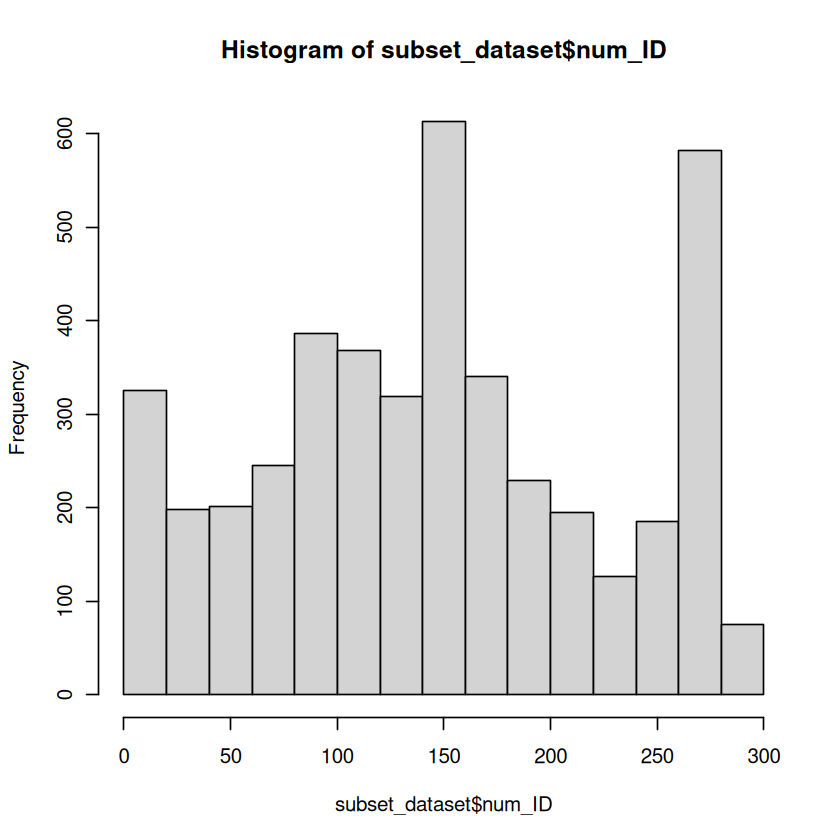

In [146]:
sum(subset_dataset$num_ID)
hist(subset_dataset$num_ID)
tail(subset_dataset$num_ID)
max(subset_dataset$num_ID)
table(subset_dataset$num_ID)

In [1]:
unique_ids <- unique(subset_dataset$num_ID)
library(ggplot2)

# Loop through each unique ID
for (id in unique_ids) {
  # Create a subset for the current ID
  current_subset <- subset(subset_dataset, num_ID == id)
  
  # Extract the unique PopBio_unit
  unique_unit <- unique(current_subset$PopBio_units)
  
  # Determine the unit label (assuming only one unit per ID for simplicity)
  if(length(unique_unit) == 1) {
    unit_label <- unique_unit
  } else {
    unit_label <- "Various Units"
  }
  
  # Generate the plot
  p <- ggplot(current_subset, aes(x = Time, y = PopBio)) +
    geom_point() +  # Adds scatter plot points
    labs(title = paste("Scatter Plot of Time vs PopBio for ID", id, "."),
         x = "Time",
         y = paste("PopBio (", unit_label, ")", sep = "")) +
    theme_bw()  # Applies a minimalistic theme
  print(p)
  
  # Optionally, save the plot to a file
  #ggsave(filename = paste("../results/Plot_for_ID_", id, ".png", sep = ""), plot = p, width = 8, height = 6)
}





ERROR: Error: object 'subset_dataset' not found


## Q & A 
- Ive been doing my workflow on jupyter notebooks - should I push those in the git?
- In the SI should I put all of the plots? and in the paper should I add some reference plots? How do I pick reference plots? 
- Im thinking of doing Exponential modelling for lm() and Logistic growth/ gompertz population growth model/ 
- What to do for graphs that look diff? Do I need to also focus on why its an outlier 



#### Which model works best for this data in general? 
#### 50% of the data fits blabla model first

- read Johnson and Omlan paper
- error distribution?
- log the data ? why? 

## Models I could use - modelling, star star

|Lin/Non Linear model | Model type|
|------------|------------|
| Linear Model | Exponential |
|Non Linear Model | Logistic Regression |
|Non Linear Model | Gompertz popu growth |
|Non Linear Model | ? |

## references 

|Author| Title | What it is/Where I got it from | Notes |
|------|-------|--------------------------------|-------|
|C. Ritz and JC Streibi  |Nonlinear regression w R | Library book |  |
|KB. Newman, ST. Buckland, BJT Morgan et al. | Modelling Popu dynamics | Library book ||
| L Edelstein-Keshet| Mathematical Models in Biology | Lib book big one blue | The growth equation contains an oscillatory component if one of the eigenvalues is negative or complex -- any model used to describe population growth cannot admit negative BioPop values. While oscillations may occur, they are generally superimposed on a large amplitude behaviour so that successive POpBio are positive.    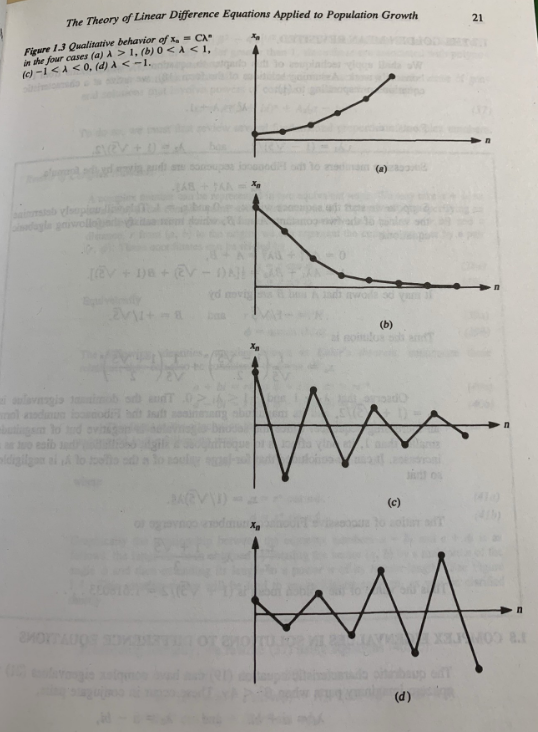      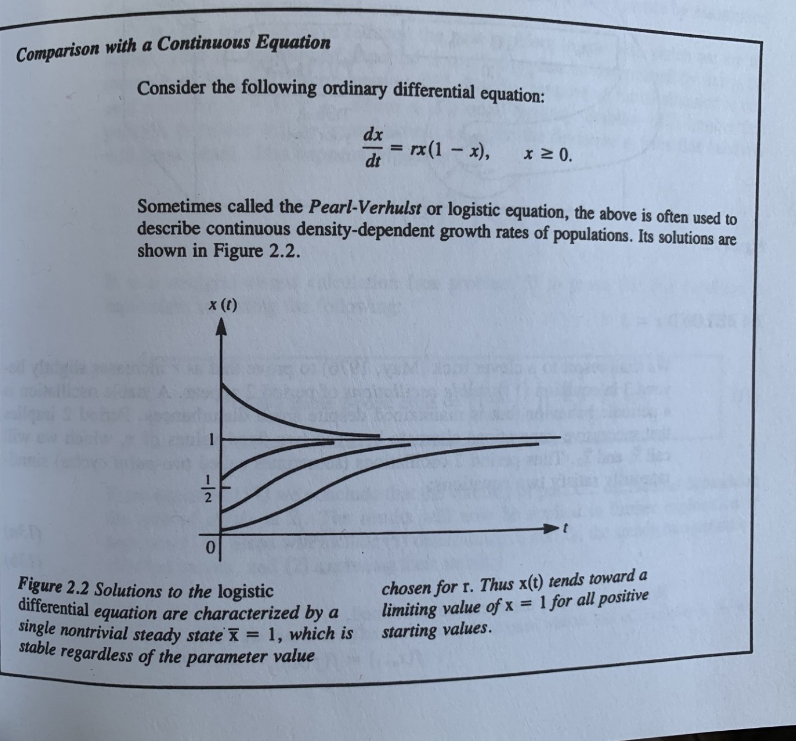  Simple microbiology experiment - growing bacteria and following changes in population. typically a droplet of bacterial suspension is introduced into a flask tube containing nutrient medium (broth thay supplies all essentials for bacterial viability). The culture is then maintianed in conditions suitable for growth and often kept at an agitated state  |
 



## Key sentences I want to use

- to place this linear mofel in proper context we should add various qualifying remarks. We have used many Simplyfing assumptions

1. big for loop
create a df 
    w AIC,BIC, R2, 
order w time (?) 


Bridge log all her data - consider


sns.lmplot(x= "Time", y = "PopBio", data = data_subset, fit_reg = False) # will give warning - you can ignore it

In [ ]:
#backup logistic growth 
#LOGISTIC FIT
logistic1 <- function(t, r, K, N0){
 N0 * K * exp(r * t)/(K+N0 * (exp(r * t)-1))
}

failed_count <- 0

for (id in unique_ids) {
    current_subset <- subset(data, num_ID == id)
    #initial parameters r, k, N0
    #r is the gradient of the linear model
    linear_mod <- lm(logPopBio ~ Time, data = current_subset)
    r_est <- coef(linear_mod) ["Time"]
    
    #k is the max of logPopBio -- carrying capacity 
    k_est <- max(current_subset$logPopBio)

    #N0 is the initial logPopBio recorded: order logPopBio by time and select 1st value
    order_logPopBio <- current_subset[order(current_subset$Time), ]$logPopBio
    N0_est <- order_logPopBio[1] 

    #r is the gradient of linear regression
    initial_estimates <- list(r = r_est, K = k_est, N0 = N0_est) 
  
    control <- nls.control(maxiter = 100)

    Logisticfit <- tryCatch(
    {
       nlsLM(logPopBio ~ logistic1(Time, r, K, N0), data = current_subset, start = initial_estimates, control = control)
     }
      , error = function(e) 
    {
      cat("error in fitting model for ID", id, ":", conditionMessage(e), "\n")
      failed_count <<- failed_count + 1 # increase failed by 1 each time
      return(NULL)  
    })

    if(is.null(Logisticfit)) {
      p<-ggplot(current_subset, aes(x = Time, y = logPopBio)) +
          geom_point()+
          labs(title = paste ("Failed to fit logistic model", id), 
          x = "Time", y = "logPopBio") +
          theme_bw()
    } else { # plot the graph of the failed to look at it

    # Predictions
    time_values <- data.frame(Time = seq(min(current_subset$Time), max(current_subset$Time), length.out = 100))
    time_values$logPopBio_pred = predict(Logisticfit, newdata = time_values)
    
    # Extract the unique PopBio_unit
    unique_unit <- unique(current_subset$PopBio_units)
    unit_label <- if(length(unique_unit) == 1) unique_unit else "Various Units"

    # Store metrics in results_df
    #results_df$R2_logistic[id] <- summary(Logisticfit)$r.squared  # R-squared may not be directly available like this for nls models
    results_df$AIC_logistic[id] <- AIC(Logisticfit)
    results_df$BIC_logistic[id] <- BIC(Logisticfit)

    # Generate the plot with actual data points and the predicted regression line
    p <- ggplot(current_subset, aes(x = Time, y = logPopBio)) +
        geom_point() +
        geom_line(data = time_values, aes(x = Time, y = logPopBio_pred), color = "red") +
        labs(title = paste("Scatter Plot of Time vs log(PopBio) for ID", id, "with Logistic Fit"),
             x = "Time",
             y = paste("log(PopBio) (", unit_label, ")", sep = "")) +
        theme_bw()
    }
    # Save each plot
    #ggsave(filename = paste("../results/Logistic_Model_Plot_", id, ".png", sep = ""), plot = p, width = 8, height = 6)
}

cat("Number of failed model fits", failed_count, "\n")

#failed is ID == 230 -

